In [1]:
# Import required packages
import time
import xlsxwriter
import numpy as np
import pandas as pd
import datetime

from math import pi, ceil
from matplotlib import cm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)

In [2]:
# Import audio features dataset
df = pd.read_excel("eng_features.xlsx",
                   header=0)
df

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,*NSYNC,(God Must Have Spent) A Little More Time On Yo...,2005,59,0.468,0.535,10,-8.264,1,0.0436,0.4400,0.000000,0.1010,0.294,168.001,audio_features,72otaqywVqwyXaCjk75JKm,spotify:track:72otaqywVqwyXaCjk75JKm,https://api.spotify.com/v1/tracks/72otaqywVqwy...,https://api.spotify.com/v1/audio-analysis/72ot...,243493,4
1,*NSYNC,Bye Bye Bye,2000,72,0.610,0.926,8,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,audio_features,62bOmKYxYg7dhrC6gH9vFn,spotify:track:62bOmKYxYg7dhrC6gH9vFn,https://api.spotify.com/v1/tracks/62bOmKYxYg7d...,https://api.spotify.com/v1/audio-analysis/62bO...,200400,4
2,*NSYNC,Tearin' up My Heart - Radio Edit,1997,64,0.686,0.915,7,-4.447,1,0.0364,0.0028,0.000007,0.2330,0.796,110.054,audio_features,594M0rqYMOo8BhMGEdoi5C,spotify:track:594M0rqYMOo8BhMGEdoi5C,https://api.spotify.com/v1/tracks/594M0rqYMOo8...,https://api.spotify.com/v1/audio-analysis/594M...,211000,4
3,*NSYNC,This I Promise You,2000,70,0.550,0.587,2,-6.279,1,0.0329,0.3540,0.000000,0.1280,0.466,165.975,audio_features,46n2EGFnPC3tzWCN1Aqe26,spotify:track:46n2EGFnPC3tzWCN1Aqe26,https://api.spotify.com/v1/tracks/46n2EGFnPC3t...,https://api.spotify.com/v1/audio-analysis/46n2...,284760,4
4,3 Doors Down,Here Without You,2002,76,0.557,0.533,10,-6.817,0,0.0252,0.0492,0.000000,0.2050,0.233,143.994,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238733,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,fun.,Carry On,2012,63,0.388,0.694,5,-5.769,1,0.0735,0.1180,0.000293,0.0820,0.365,145.434,audio_features,7gpy7sfWPNuOKmUNs3XQYE,spotify:track:7gpy7sfWPNuOKmUNs3XQYE,https://api.spotify.com/v1/tracks/7gpy7sfWPNuO...,https://api.spotify.com/v1/audio-analysis/7gpy...,278373,5
2126,fun.,Sleigh Ride,2012,24,0.558,0.731,0,-6.282,1,0.0325,0.1250,0.000000,0.0932,0.381,100.035,audio_features,0kIVSKPygLNAEBi7EVeeJn,spotify:track:0kIVSKPygLNAEBi7EVeeJn,https://api.spotify.com/v1/tracks/0kIVSKPygLNA...,https://api.spotify.com/v1/audio-analysis/0kIV...,217000,4
2127,fun.,Some Nights,2012,73,0.672,0.738,0,-7.045,1,0.0506,0.0178,0.000068,0.0927,0.392,107.938,audio_features,6t6oULCRS6hnI7rm0h5gwl,spotify:track:6t6oULCRS6hnI7rm0h5gwl,https://api.spotify.com/v1/tracks/6t6oULCRS6hn...,https://api.spotify.com/v1/audio-analysis/6t6o...,277040,4
2128,fun.,Why Am I the One,2012,48,0.408,0.499,6,-7.160,1,0.0547,0.4400,0.000004,0.5950,0.501,82.157,audio_features,5QbQ5iAebksB5Wj5BPazNX,spotify:track:5QbQ5iAebksB5Wj5BPazNX,https://api.spotify.com/v1/tracks/5QbQ5iAebksB...,https://api.spotify.com/v1/audio-analysis/5QbQ...,286707,4


In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2130 non-null   object 
 1   track_name        2130 non-null   object 
 2   year              2130 non-null   int64  
 3   popularity        2130 non-null   int64  
 4   danceability      2130 non-null   float64
 5   energy            2130 non-null   float64
 6   key               2130 non-null   int64  
 7   loudness          2130 non-null   float64
 8   mode              2130 non-null   int64  
 9   speechiness       2130 non-null   float64
 10  acousticness      2130 non-null   float64
 11  instrumentalness  2130 non-null   float64
 12  liveness          2130 non-null   float64
 13  valence           2130 non-null   float64
 14  tempo             2130 non-null   float64
 15  type              2130 non-null   object 
 16  id                2130 non-null   object 


,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,2007.546479,58.849765,0.583362,0.699670,5.094366,-6.134808,0.727700,0.056613,0.169180,0.015168,0.178885,0.505389,121.689663,230953.009859,3.964789
std,10.206232,17.351097,0.135808,0.186325,3.612906,2.708631,0.445248,0.047883,0.229472,0.088489,0.135394,0.231503,26.529461,42546.387039,0.272731
min,1935.000000,0.000000,0.104000,0.025100,0.000000,-22.602000,0.000000,0.022300,0.000002,0.000000,0.020000,0.034900,52.572000,42107.000000,1.000000
25%,2005.000000,49.000000,0.501000,0.586000,2.000000,-7.242500,0.000000,0.031900,0.010800,0.000000,0.093400,0.326000,100.640500,205350.250000,4.000000
50%,2011.000000,63.000000,0.592000,0.737500,5.000000,-5.509000,1.000000,0.040650,0.061250,0.000000,0.126000,0.501000,121.967500,225300.000000,4.000000
75%,2014.000000,71.000000,0.679750,0.844750,8.000000,-4.315500,1.000000,0.060000,0.238750,0.000047,0.226750,0.684000,136.684250,248750.000000,4.000000
max,2020.000000,99.000000,0.980000,0.989000,11.000000,-0.821000,1.000000,0.512000,0.991000,0.961000,0.960000,0.980000,205.322000,688453.000000,5.000000


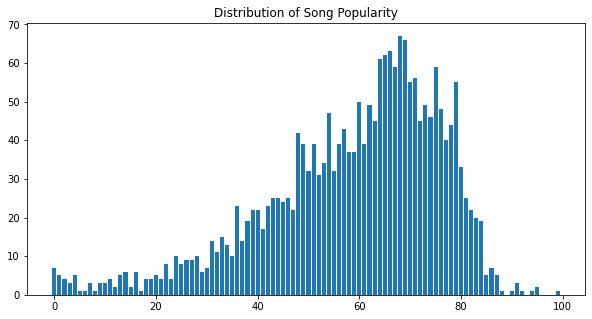

In [4]:
# Plot bar chart to show distribution of song popularity
df_popularity = pd.DataFrame({'score': df.popularity.value_counts().index.to_list()})
df_popularity['value_counts'] = df.popularity.value_counts().to_list()
df_popularity.sort_values(by=['score'],
                          axis=0,
                          ascending=True,
                          inplace=True)
df_popularity.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,5))
plt.bar(df_popularity['score'], df_popularity['value_counts'])
plt.title("Distribution of Song Popularity")
plt.show()

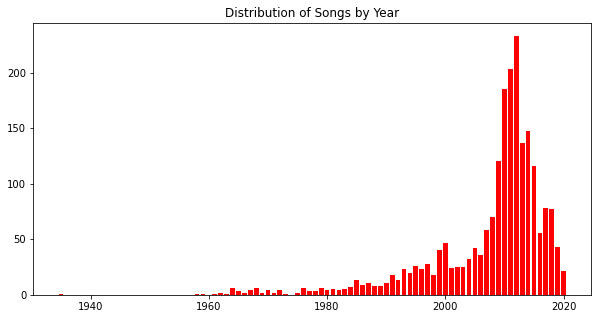

In [5]:
# Plot bar chart to show distribution of song by year
df_year = pd.DataFrame({'year': df.year.value_counts().index.to_list()})
df_year['value_counts'] = df.year.value_counts().to_list()
df_year.sort_values(by=['year'],
                    axis=0,
                    ascending=True,
                    inplace=True)
df_year.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,5))
plt.bar(df_year['year'], df_year['value_counts'], color='red')
plt.title("Distribution of Songs by Year")
plt.show()

In [6]:
list(df.columns)

['artist',
 'track_name',
 'year',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

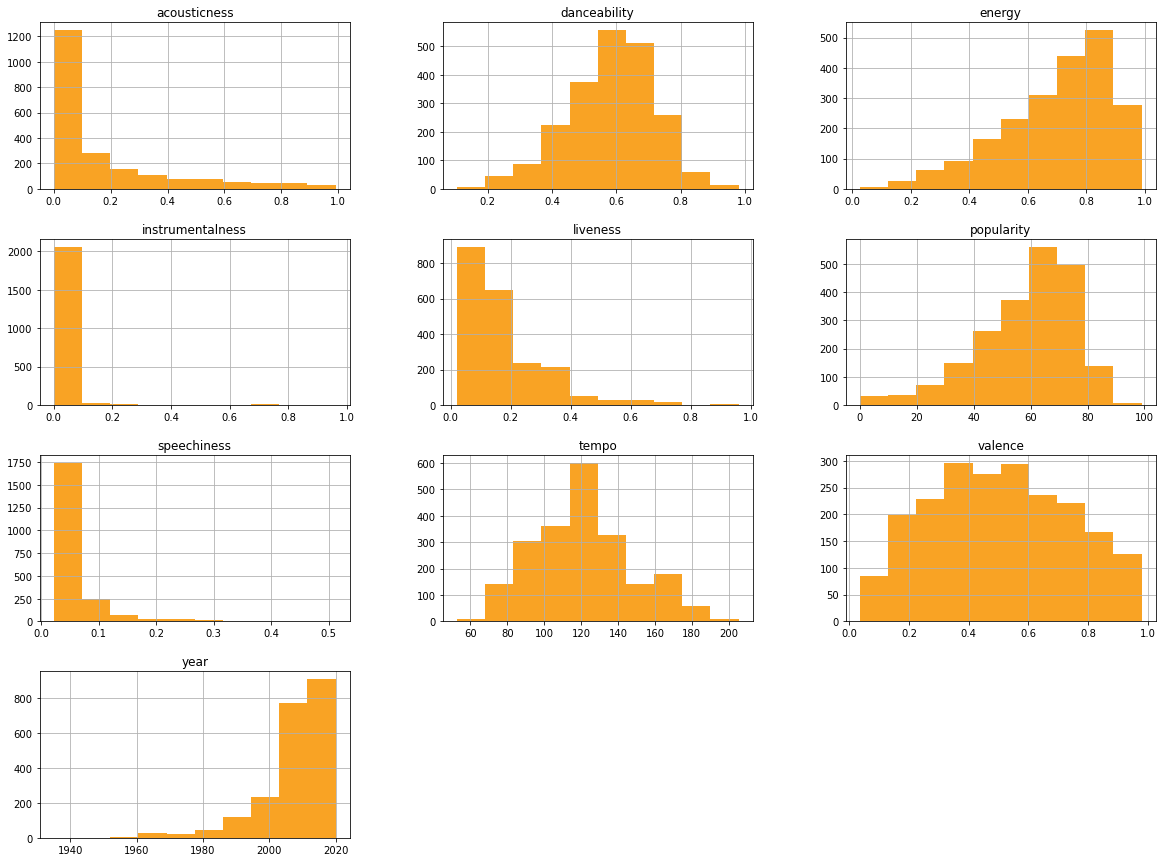

In [7]:
df[['acousticness', 'danceability', 'instrumentalness', 
    'energy', 'speechiness','tempo',
    'liveness', 'valence', 'year', 'popularity']].hist(figsize=(20,15), 
                                                       color='#f9a324')
plt.show()

In [8]:
# Correlation Matrix
df[['acousticness', 'danceability', 'instrumentalness', 
    'energy', 'speechiness','tempo',
    'liveness', 'valence', 'loudness']].corr()

,acousticness,danceability,instrumentalness,energy,speechiness,tempo,liveness,valence,loudness
acousticness,1.000000,-0.165450,0.028663,-0.718011,-0.114245,-0.161168,-0.117906,-0.251170,-0.570122
danceability,-0.165450,1.000000,-0.058226,0.157868,0.061180,-0.209029,-0.045946,0.532964,0.139931
instrumentalness,0.028663,-0.058226,1.000000,-0.071249,-0.056011,-0.026824,-0.026291,-0.073400,-0.131303
energy,-0.718011,0.157868,-0.071249,1.000000,0.246966,0.191377,0.192493,0.411501,0.745831
speechiness,-0.114245,0.061180,-0.056011,0.246966,1.000000,0.164636,0.147136,0.146881,0.174567
tempo,-0.161168,-0.209029,-0.026824,0.191377,0.164636,1.000000,0.041801,0.040658,0.150539
liveness,-0.117906,-0.045946,-0.026291,0.192493,0.147136,0.041801,1.000000,0.058091,0.104673
valence,-0.251170,0.532964,-0.073400,0.411501,0.146881,0.040658,0.058091,1.000000,0.250041
loudness,-0.570122,0.139931,-0.131303,0.745831,0.174567,0.150539,0.104673,0.250041,1.000000


In [9]:
# Features to be used in analysis
cluster_features = ['acousticness', 
                    'instrumentalness', 
                    'energy', 
                    'speechiness',
                    'valence']
df_features = df[cluster_features].copy()
df_features

,acousticness,instrumentalness,energy,speechiness,valence
0,0.4400,0.000000,0.535,0.0436,0.294
1,0.0310,0.001200,0.926,0.0479,0.861
2,0.0028,0.000007,0.915,0.0364,0.796
3,0.3540,0.000000,0.587,0.0329,0.466
4,0.0492,0.000000,0.533,0.0252,0.233
...,...,...,...,...,...
2125,0.1180,0.000293,0.694,0.0735,0.365
2126,0.1250,0.000000,0.731,0.0325,0.381
2127,0.0178,0.000068,0.738,0.0506,0.392
2128,0.4400,0.000004,0.499,0.0547,0.501


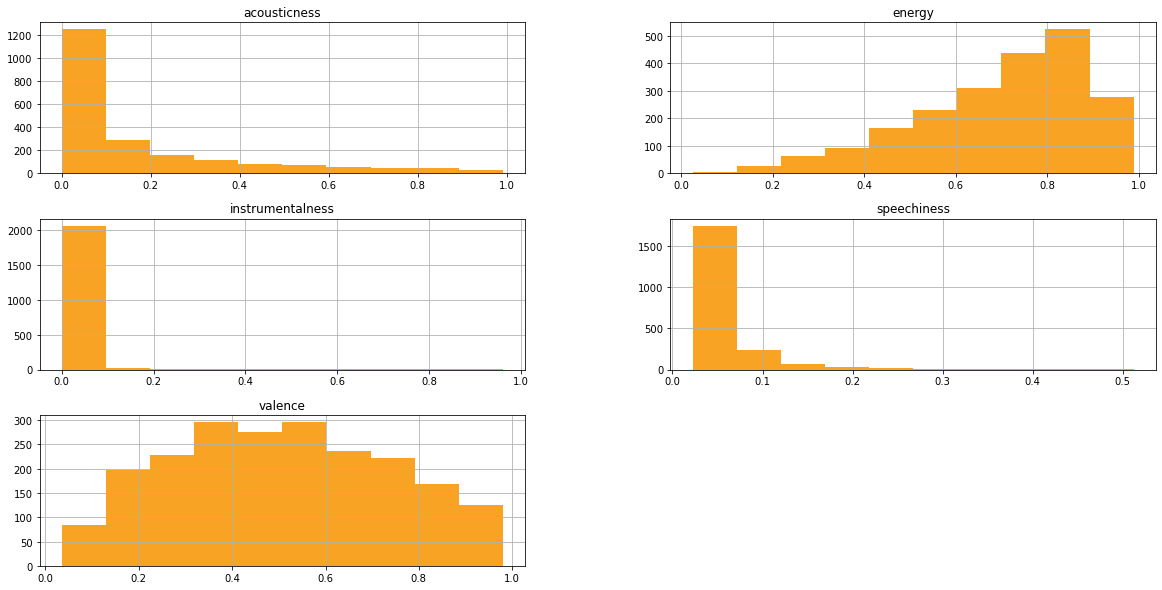

In [10]:
df_features.hist(figsize=(20,10), color='#f9a324')
plt.show()

In [11]:
# Feature scaling before fitting the model
X = np.array(df_features)
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)
pd.DataFrame(X)

# scalar = StandardScaler()
# df_features['tempo'] = scalar.fit_transform(df_features[['tempo']])
# df_features['instrumentalness'] = scalar.fit_transform(df_features[['instrumentalness']])
# df_features

,0,1,2,3,4
0,1.180463,-0.171454,-0.883987,-0.271828,-0.913329
1,-0.602307,-0.157889,1.214994,-0.182005,1.536455
2,-0.725227,-0.171373,1.155943,-0.422230,1.255616
3,0.805602,-0.171454,-0.604839,-0.495343,-0.170185
4,-0.522976,-0.171454,-0.894724,-0.656189,-1.176886
...,...,...,...,...,...
2125,-0.223087,-0.168142,-0.030437,0.352759,-0.606566
2126,-0.192575,-0.171454,0.168187,-0.503698,-0.537437
2127,-0.659844,-0.170691,0.205765,-0.125604,-0.489910
2128,1.180463,-0.171408,-1.077244,-0.039958,-0.018964


In [12]:
# Fitting the K-Means++ model with different n_cluster values for analysis
ss_dist = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=42)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

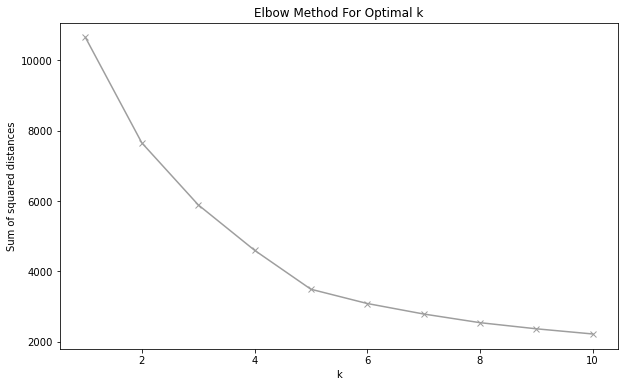

In [13]:
# Visual analysis of SDD errors across different n_clusters under k-means++
plt.figure(figsize=(10,6))
plt.plot(K, ss_dist, 'bx-', color='#9e9e9e')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=42).fit(X)

In [15]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=4, random_state=42)
pca_results = pca.fit_transform(X)

In [16]:
# Analyzing Explained Variance Ratio after dimensionality reduction
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.9498623196797541


array([0.40951474, 0.61151873, 0.79447603, 0.94986232])

In [17]:
df_scree = pd.DataFrame({'Component':['1', '2', '3', '4'], 'Indiv': pca.explained_variance_ratio_})
df_scree['cum_sum'] = df_scree['Indiv'].cumsum()
df_scree

,Component,Indiv,cum_sum
0,1,0.409515,0.409515
1,2,0.202004,0.611519
2,3,0.182957,0.794476
3,4,0.155386,0.949862


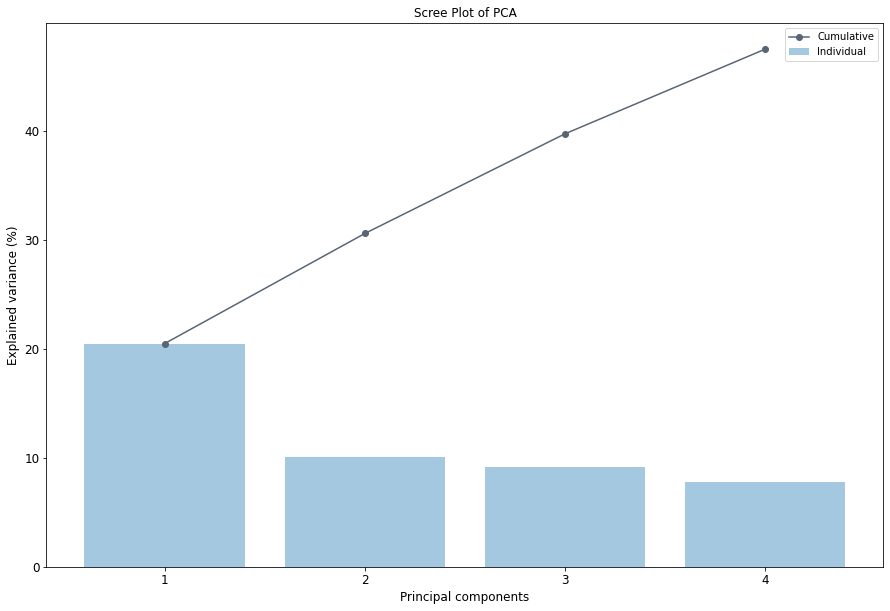

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='#576574', axes=ax, marker='o')

ax.set_xticks(range(0,4))
ax.set_xticklabels(range(1,5), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

In [19]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3', 'PC4']
df_pca['label'] = kmeanModel.labels_
df_pca

,PC1,PC2,PC3,PC4,label
0,1.684671,-0.393220,0.069932,0.194089,4
1,-1.741555,0.091344,-0.500309,-0.943747,2
2,-1.587831,0.207434,-0.736643,-0.698513,2
3,1.035464,-0.251746,-0.252296,-0.313585,1
4,0.940216,0.189197,-0.674222,1.008062,1
...,...,...,...,...,...
2125,0.038465,-0.164512,0.198077,0.701845,1
2126,0.137623,0.129998,-0.564909,0.510607,1
2127,-0.278040,0.123357,-0.350503,0.719194,1
2128,1.356678,-0.569868,0.277376,-0.583986,4


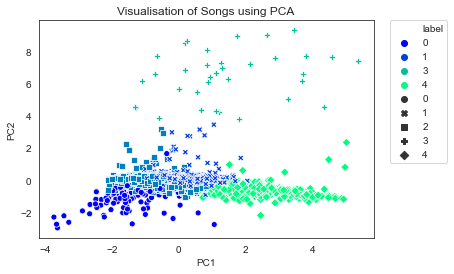

In [20]:
p = ['#DC4E76', '#CC4B93', '#A946BE', '#5C4AE4', '#35375A']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

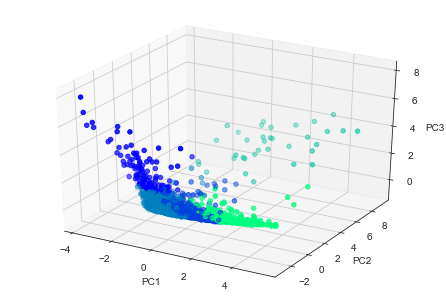

In [21]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap= 'winter')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [22]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=42, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [23]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,36.038795,7.547215,4
1,-31.744255,19.791084,2
2,-28.354811,16.573620,2
3,28.820147,9.920873,1
4,34.282722,-21.143738,1


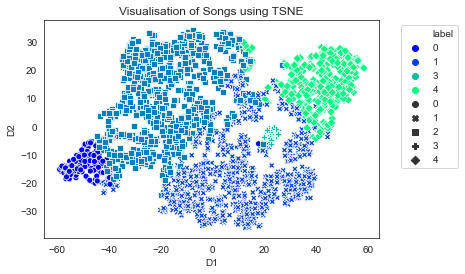

In [24]:
sns.set_style('white')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

In [25]:
df['cluster'] = df_pca['label']
df

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,*NSYNC,(God Must Have Spent) A Little More Time On Yo...,2005,59,0.468,0.535,10,-8.264,1,0.0436,0.4400,0.000000,0.1010,0.294,168.001,audio_features,72otaqywVqwyXaCjk75JKm,spotify:track:72otaqywVqwyXaCjk75JKm,https://api.spotify.com/v1/tracks/72otaqywVqwy...,https://api.spotify.com/v1/audio-analysis/72ot...,243493,4,4
1,*NSYNC,Bye Bye Bye,2000,72,0.610,0.926,8,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,audio_features,62bOmKYxYg7dhrC6gH9vFn,spotify:track:62bOmKYxYg7dhrC6gH9vFn,https://api.spotify.com/v1/tracks/62bOmKYxYg7d...,https://api.spotify.com/v1/audio-analysis/62bO...,200400,4,2
2,*NSYNC,Tearin' up My Heart - Radio Edit,1997,64,0.686,0.915,7,-4.447,1,0.0364,0.0028,0.000007,0.2330,0.796,110.054,audio_features,594M0rqYMOo8BhMGEdoi5C,spotify:track:594M0rqYMOo8BhMGEdoi5C,https://api.spotify.com/v1/tracks/594M0rqYMOo8...,https://api.spotify.com/v1/audio-analysis/594M...,211000,4,2
3,*NSYNC,This I Promise You,2000,70,0.550,0.587,2,-6.279,1,0.0329,0.3540,0.000000,0.1280,0.466,165.975,audio_features,46n2EGFnPC3tzWCN1Aqe26,spotify:track:46n2EGFnPC3tzWCN1Aqe26,https://api.spotify.com/v1/tracks/46n2EGFnPC3t...,https://api.spotify.com/v1/audio-analysis/46n2...,284760,4,1
4,3 Doors Down,Here Without You,2002,76,0.557,0.533,10,-6.817,0,0.0252,0.0492,0.000000,0.2050,0.233,143.994,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238733,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,fun.,Carry On,2012,63,0.388,0.694,5,-5.769,1,0.0735,0.1180,0.000293,0.0820,0.365,145.434,audio_features,7gpy7sfWPNuOKmUNs3XQYE,spotify:track:7gpy7sfWPNuOKmUNs3XQYE,https://api.spotify.com/v1/tracks/7gpy7sfWPNuO...,https://api.spotify.com/v1/audio-analysis/7gpy...,278373,5,1
2126,fun.,Sleigh Ride,2012,24,0.558,0.731,0,-6.282,1,0.0325,0.1250,0.000000,0.0932,0.381,100.035,audio_features,0kIVSKPygLNAEBi7EVeeJn,spotify:track:0kIVSKPygLNAEBi7EVeeJn,https://api.spotify.com/v1/tracks/0kIVSKPygLNA...,https://api.spotify.com/v1/audio-analysis/0kIV...,217000,4,1
2127,fun.,Some Nights,2012,73,0.672,0.738,0,-7.045,1,0.0506,0.0178,0.000068,0.0927,0.392,107.938,audio_features,6t6oULCRS6hnI7rm0h5gwl,spotify:track:6t6oULCRS6hnI7rm0h5gwl,https://api.spotify.com/v1/tracks/6t6oULCRS6hn...,https://api.spotify.com/v1/audio-analysis/6t6o...,277040,4,1
2128,fun.,Why Am I the One,2012,48,0.408,0.499,6,-7.160,1,0.0547,0.4400,0.000004,0.5950,0.501,82.157,audio_features,5QbQ5iAebksB5Wj5BPazNX,spotify:track:5QbQ5iAebksB5Wj5BPazNX,https://api.spotify.com/v1/tracks/5QbQ5iAebksB...,https://api.spotify.com/v1/audio-analysis/5QbQ...,286707,4,4


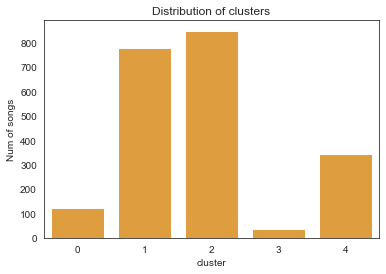

In [26]:
df.loc[:,'cluster'] = kmeanModel.labels_
df_cluster_size = df.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= df_cluster_size, x='cluster', y='Num of songs', color='#f9a324')
plt.title('Distribution of clusters')
plt.show()

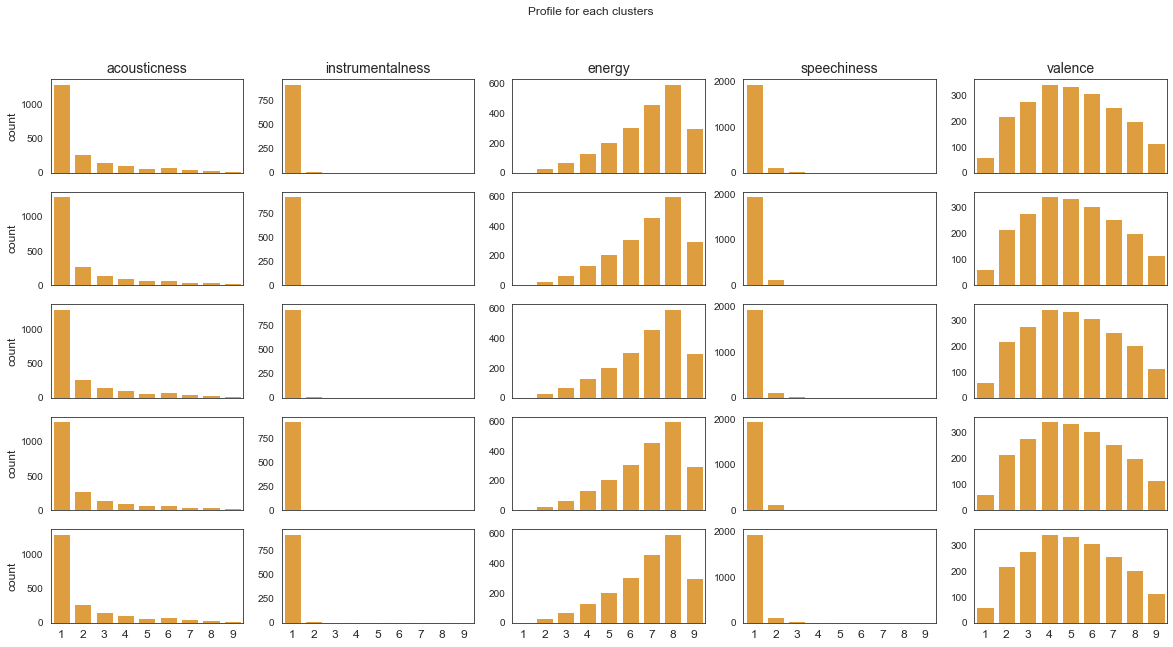

In [27]:
### Profiling each cluster
# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df[df['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_features.groupby(pd.cut(df_features[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='#c8d6e5', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='#f9a324', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()

In [28]:
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,acousticness,instrumentalness,energy,speechiness,valence
0,0,0.110880,0.002711,0.805967,0.211862,0.574805
1,1,0.086018,0.005701,0.701612,0.044418,0.339738
2,2,0.078427,0.003995,0.805857,0.053551,0.715813
3,3,0.202982,0.649314,0.610143,0.038751,0.395234
4,4,0.600388,0.004112,0.403434,0.038074,0.347591


In [29]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

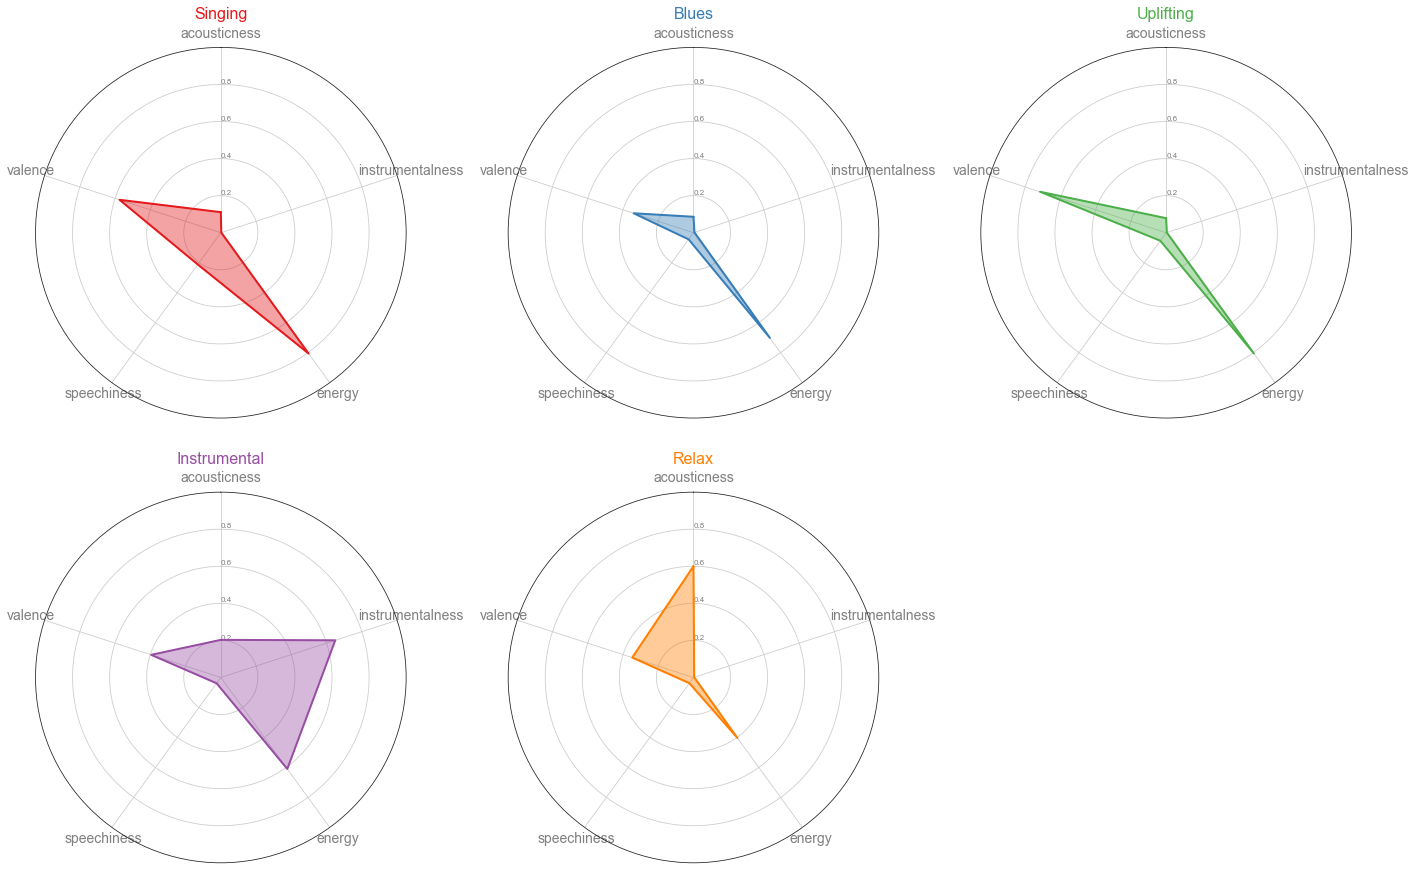

In [30]:
# initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B'
plt.figure(figsize=(24,15))

# Create cluster name
title_list = ['Singing', 'Blues', 'Uplifting', 'Instrumental', 'Relax']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=title_list[row], 
               color=cm.Set1.colors[row], dframe=df_radar, num_clusters=len(df_radar.index))
    
# Show plot
plt.show()

In [31]:
cluster_num = 0
df_cluster1 = df[df['cluster'] == cluster_num]
df_cluster1

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
5,3OH!3,DONTTRUSTME,2008,71,0.791,0.713,5,-3.742,0,0.254,0.016300,0.000000,0.1890,0.514,130.012,audio_features,5jzX4dWVQeBTtfBaXnMRt5,spotify:track:5jzX4dWVQeBTtfBaXnMRt5,https://api.spotify.com/v1/tracks/5jzX4dWVQeBT...,https://api.spotify.com/v1/audio-analysis/5jzX...,192573,4,0
12,5 Seconds of Summer,She Looks So Perfect,2014,71,0.494,0.951,9,-4.237,1,0.132,0.000569,0.000000,0.3270,0.441,160.025,audio_features,1gugDOSMREb34Xo0c1PlxM,spotify:track:1gugDOSMREb34Xo0c1PlxM,https://api.spotify.com/v1/tracks/1gugDOSMREb3...,https://api.spotify.com/v1/audio-analysis/1gug...,202496,4,0
15,5 Seconds of Summer,Youngblood,2018,31,0.628,0.853,7,-5.118,0,0.403,0.016500,0.000000,0.1720,0.146,119.994,audio_features,534TGPW8WRVaQHDbFSbK3C,spotify:track:534TGPW8WRVaQHDbFSbK3C,https://api.spotify.com/v1/tracks/534TGPW8WRVa...,https://api.spotify.com/v1/audio-analysis/534T...,202093,4,0
26,AC/DC,Highway to Hell,1979,84,0.574,0.913,6,-4.793,0,0.133,0.061000,0.001580,0.1560,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4,0
31,Adam Lambert,Better Than I Know Myself,2012,50,0.484,0.812,10,-4.743,1,0.138,0.032200,0.000000,0.1800,0.308,109.452,audio_features,3Fsjt1h1p2o86pC2lQopJc,spotify:track:3Fsjt1h1p2o86pC2lQopJc,https://api.spotify.com/v1/tracks/3Fsjt1h1p2o8...,https://api.spotify.com/v1/audio-analysis/3Fsj...,216173,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,Twenty One Pilots,Stressed Out,2015,84,0.734,0.637,4,-5.677,0,0.141,0.046200,0.000023,0.0602,0.648,169.977,audio_features,3CRDbSIZ4r5MsZ0YwxuEkn,spotify:track:3CRDbSIZ4r5MsZ0YwxuEkn,https://api.spotify.com/v1/tracks/3CRDbSIZ4r5M...,https://api.spotify.com/v1/audio-analysis/3CRD...,202333,4,0
2086,Wiz Khalifa,Roll Up,2011,65,0.523,0.805,3,-5.473,1,0.192,0.052400,0.000000,0.0914,0.602,125.358,audio_features,53DB6LJV9B8sz0p1s6tlGS,spotify:track:53DB6LJV9B8sz0p1s6tlGS,https://api.spotify.com/v1/tracks/53DB6LJV9B8s...,https://api.spotify.com/v1/audio-analysis/53DB...,227773,5,0
2091,Yellowcard,Awakening,2012,11,0.304,0.980,1,-2.557,0,0.147,0.000043,0.000009,0.4730,0.309,193.458,audio_features,3KvocEl2AbGs2Woc46ysbG,spotify:track:3KvocEl2AbGs2Woc46ysbG,https://api.spotify.com/v1/tracks/3KvocEl2AbGs...,https://api.spotify.com/v1/audio-analysis/3Kvo...,263922,4,0
2099,"Young Money, Lloyd",BedRock,2009,73,0.733,0.664,8,-6.163,1,0.295,0.102000,0.000000,0.1910,0.557,148.005,audio_features,3iL2l5gUqyPS6vDwJFgJTR,spotify:track:3iL2l5gUqyPS6vDwJFgJTR,https://api.spotify.com/v1/tracks/3iL2l5gUqyPS...,https://api.spotify.com/v1/audio-analysis/3iL2...,288133,4,0


In [32]:
cluster_num = 1
df_cluster2 = df[df['cluster'] == cluster_num]
df_cluster2

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
3,*NSYNC,This I Promise You,2000,70,0.550,0.587,2,-6.279,1,0.0329,0.35400,0.000000,0.1280,0.466,165.975,audio_features,46n2EGFnPC3tzWCN1Aqe26,spotify:track:46n2EGFnPC3tzWCN1Aqe26,https://api.spotify.com/v1/tracks/46n2EGFnPC3t...,https://api.spotify.com/v1/audio-analysis/46n2...,284760,4,1
4,3 Doors Down,Here Without You,2002,76,0.557,0.533,10,-6.817,0,0.0252,0.04920,0.000000,0.2050,0.233,143.994,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,https://api.spotify.com/v1/audio-analysis/3NLr...,238733,4,1
7,"3OH!3, Matt Squire",STARSTRUKK (feat. Katy Perry),2009,63,0.607,0.805,11,-5.579,0,0.0608,0.00175,0.000000,0.2310,0.232,139.894,audio_features,1hBM2D1ULT3aeKuddSwPsK,spotify:track:1hBM2D1ULT3aeKuddSwPsK,https://api.spotify.com/v1/tracks/1hBM2D1ULT3a...,https://api.spotify.com/v1/audio-analysis/1hBM...,202667,4,1
8,4 Non Blondes,What's Up?,1992,80,0.565,0.564,2,-10.044,1,0.0292,0.16100,0.000000,0.1140,0.454,134.355,audio_features,0jWgAnTrNZmOGmqgvHhZEm,spotify:track:0jWgAnTrNZmOGmqgvHhZEm,https://api.spotify.com/v1/tracks/0jWgAnTrNZmO...,https://api.spotify.com/v1/audio-analysis/0jWg...,295533,4,1
9,5 Seconds of Summer,Amnesia,2014,69,0.572,0.499,2,-5.237,1,0.0311,0.02830,0.000000,0.2130,0.108,101.593,audio_features,1JCCdiru7fhstOIF4N7WJC,spotify:track:1JCCdiru7fhstOIF4N7WJC,https://api.spotify.com/v1/tracks/1JCCdiru7fhs...,https://api.spotify.com/v1/audio-analysis/1JCC...,237248,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,"Zedd, Matthew Koma, Miriam Bryant",Find You,2014,54,0.537,0.759,3,-5.622,1,0.0444,0.02670,0.000000,0.0947,0.377,127.973,audio_features,1gpF8IwQQj8qOeVjHfIIDU,spotify:track:1gpF8IwQQj8qOeVjHfIIDU,https://api.spotify.com/v1/tracks/1gpF8IwQQj8q...,https://api.spotify.com/v1/audio-analysis/1gpF...,203307,4,1
2118,"Zedd, Selena Gomez",I Want You To Know,2015,68,0.580,0.846,9,-2.876,0,0.0573,0.00537,0.000007,0.1450,0.366,129.998,audio_features,1JDIArrcepzWDTAWXdGYmP,spotify:track:1JDIArrcepzWDTAWXdGYmP,https://api.spotify.com/v1/tracks/1JDIArrcepzW...,https://api.spotify.com/v1/audio-analysis/1JDI...,240000,4,1
2125,fun.,Carry On,2012,63,0.388,0.694,5,-5.769,1,0.0735,0.11800,0.000293,0.0820,0.365,145.434,audio_features,7gpy7sfWPNuOKmUNs3XQYE,spotify:track:7gpy7sfWPNuOKmUNs3XQYE,https://api.spotify.com/v1/tracks/7gpy7sfWPNuO...,https://api.spotify.com/v1/audio-analysis/7gpy...,278373,5,1
2126,fun.,Sleigh Ride,2012,24,0.558,0.731,0,-6.282,1,0.0325,0.12500,0.000000,0.0932,0.381,100.035,audio_features,0kIVSKPygLNAEBi7EVeeJn,spotify:track:0kIVSKPygLNAEBi7EVeeJn,https://api.spotify.com/v1/tracks/0kIVSKPygLNA...,https://api.spotify.com/v1/audio-analysis/0kIV...,217000,4,1


In [33]:
cluster_num = 2
df_cluster3 = df[df['cluster'] == cluster_num]
df_cluster3

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
1,*NSYNC,Bye Bye Bye,2000,72,0.610,0.926,8,-4.843,0,0.0479,0.031000,0.001200,0.0821,0.861,172.638,audio_features,62bOmKYxYg7dhrC6gH9vFn,spotify:track:62bOmKYxYg7dhrC6gH9vFn,https://api.spotify.com/v1/tracks/62bOmKYxYg7d...,https://api.spotify.com/v1/audio-analysis/62bO...,200400,4,2
2,*NSYNC,Tearin' up My Heart - Radio Edit,1997,64,0.686,0.915,7,-4.447,1,0.0364,0.002800,0.000007,0.2330,0.796,110.054,audio_features,594M0rqYMOo8BhMGEdoi5C,spotify:track:594M0rqYMOo8BhMGEdoi5C,https://api.spotify.com/v1/tracks/594M0rqYMOo8...,https://api.spotify.com/v1/audio-analysis/594M...,211000,4,2
6,3OH!3,Double Vision,2010,52,0.581,0.888,0,-3.198,1,0.0587,0.001800,0.000000,0.4130,0.629,120.041,audio_features,3o2ESAMet1zR1aASlzrIxO,spotify:track:3o2ESAMet1zR1aASlzrIxO,https://api.spotify.com/v1/tracks/3o2ESAMet1zR...,https://api.spotify.com/v1/audio-analysis/3o2E...,190707,4,2
10,5 Seconds of Summer,Don't Stop,2014,58,0.571,0.957,8,-3.468,1,0.0633,0.002090,0.000015,0.0425,0.892,149.946,audio_features,57MOpbjOIoWMZnstWOtfm6,spotify:track:57MOpbjOIoWMZnstWOtfm6,https://api.spotify.com/v1/tracks/57MOpbjOIoWM...,https://api.spotify.com/v1/audio-analysis/57MO...,169936,4,2
11,5 Seconds of Summer,Hey Everybody!,2015,54,0.753,0.803,9,-3.737,1,0.0316,0.000938,0.000000,0.1010,0.853,126.017,audio_features,3ylFvJfARlPKxGWAJv6Bvf,spotify:track:3ylFvJfARlPKxGWAJv6Bvf,https://api.spotify.com/v1/tracks/3ylFvJfARlPK...,https://api.spotify.com/v1/audio-analysis/3ylF...,196937,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,a-ha,Take on Me,1985,84,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4,2
2122,blink-182,After Midnight,2011,54,0.541,0.889,9,-3.997,1,0.0490,0.006420,0.000017,0.0200,0.902,167.995,audio_features,27H8WsrkD5catdc3a2fCLV,spotify:track:27H8WsrkD5catdc3a2fCLV,https://api.spotify.com/v1/tracks/27H8WsrkD5ca...,https://api.spotify.com/v1/audio-analysis/27H8...,206867,4,2
2123,blink-182,All The Small Things,1999,80,0.434,0.897,0,-4.918,1,0.0488,0.010300,0.000000,0.6120,0.684,148.726,audio_features,2m1hi0nfMR9vdGC8UcrnwU,spotify:track:2m1hi0nfMR9vdGC8UcrnwU,https://api.spotify.com/v1/tracks/2m1hi0nfMR9v...,https://api.spotify.com/v1/audio-analysis/2m1h...,167067,4,2
2124,brb.,cool with it,2018,40,0.663,0.673,7,-9.108,1,0.0612,0.266000,0.000000,0.1940,0.793,171.984,audio_features,1t0X40USKhp2wxia69KvUo,spotify:track:1t0X40USKhp2wxia69KvUo,https://api.spotify.com/v1/tracks/1t0X40USKhp2...,https://api.spotify.com/v1/audio-analysis/1t0X...,231628,4,2


In [34]:
cluster_num = 3
df_cluster4 = df[df['cluster'] == cluster_num]
df_cluster4

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
133,Avicii,Levels - Radio Edit,2019,50,0.584,0.890,1,-5.941,0,0.0343,0.047000,0.814,0.3090,0.4660,126.040,audio_features,4MVjhujg0nKKoFVf6s0k8L,spotify:track:4MVjhujg0nKKoFVf6s0k8L,https://api.spotify.com/v1/tracks/4MVjhujg0nKK...,https://api.spotify.com/v1/audio-analysis/4MVj...,199907,4,3
178,Bananarama,Venus,1986,66,0.722,0.961,9,-4.812,1,0.0514,0.088300,0.610,0.2780,0.9100,126.113,audio_features,4XX1pFUkQOZTYp6Hb6a6Ae,spotify:track:4XX1pFUkQOZTYp6Hb6a6Ae,https://api.spotify.com/v1/tracks/4XX1pFUkQOZT...,https://api.spotify.com/v1/audio-analysis/4XX1...,229165,4,3
289,C & C Music Factory,Gonna Make You Sweat (Everybody Dance Now),1990,67,0.557,0.798,6,-7.405,1,0.0935,0.000851,0.675,0.1830,0.7940,112.187,audio_features,7eheoW4hxrH51ww2QePVwF,spotify:track:7eheoW4hxrH51ww2QePVwF,https://api.spotify.com/v1/tracks/7eheoW4hxrH5...,https://api.spotify.com/v1/audio-analysis/7ehe...,244093,4,3
373,Cigarettes After Sex,Don't Let Me Go,2019,60,0.423,0.368,6,-9.605,1,0.0261,0.451000,0.530,0.0986,0.1570,98.472,audio_features,4b3khTm3ufGRTyZwuYdasn,spotify:track:4b3khTm3ufGRTyZwuYdasn,https://api.spotify.com/v1/tracks/4b3khTm3ufGR...,https://api.spotify.com/v1/audio-analysis/4b3k...,262560,3,3
374,Cigarettes After Sex,Heavenly,2019,55,0.539,0.431,8,-9.298,1,0.0249,0.628000,0.653,0.1100,0.1220,105.156,audio_features,1Bh0UzthW8pKEnYg7v40Oa,spotify:track:1Bh0UzthW8pKEnYg7v40Oa,https://api.spotify.com/v1/tracks/1Bh0UzthW8pK...,https://api.spotify.com/v1/audio-analysis/1Bh0...,288595,4,3
375,Cigarettes After Sex,Sweet,2017,66,0.450,0.511,6,-9.073,1,0.0276,0.353000,0.766,0.1390,0.1150,96.563,audio_features,6ilc4vQcwMPlvAHFfsTGng,spotify:track:6ilc4vQcwMPlvAHFfsTGng,https://api.spotify.com/v1/tracks/6ilc4vQcwMPl...,https://api.spotify.com/v1/audio-analysis/6ilc...,292110,4,3
376,Cigarettes After Sex,Touch,2019,51,0.487,0.501,6,-9.404,1,0.0240,0.365000,0.911,0.1030,0.3720,95.924,audio_features,3A1kkAIXl4IPxeJRCCF4Bc,spotify:track:3A1kkAIXl4IPxeJRCCF4Bc,https://api.spotify.com/v1/tracks/3A1kkAIXl4IP...,https://api.spotify.com/v1/audio-analysis/3A1k...,292853,4,3
400,Coldplay,Always in My Head,2014,65,0.499,0.502,5,-9.307,1,0.0254,0.012800,0.687,0.0680,0.0397,97.544,audio_features,0FMjqbY3aWo1QDbo3GwXib,spotify:track:0FMjqbY3aWo1QDbo3GwXib,https://api.spotify.com/v1/tracks/0FMjqbY3aWo1...,https://api.spotify.com/v1/audio-analysis/0FMj...,216627,3,3
403,Coldplay,Atlas - From “The Hunger Games: Catching Fire”...,2013,54,0.280,0.449,11,-7.736,1,0.0292,0.638000,0.701,0.1050,0.1030,136.400,audio_features,2DI0fZ4QZmLtapszYaoG6F,spotify:track:2DI0fZ4QZmLtapszYaoG6F,https://api.spotify.com/v1/tracks/2DI0fZ4QZmLt...,https://api.spotify.com/v1/audio-analysis/2DI0...,236093,4,3
416,Coldplay,Lost!,2008,53,0.359,0.779,7,-7.520,1,0.0412,0.005700,0.837,0.3790,0.5820,86.951,audio_features,1STAWoWHYJh2UVUx41pYMD,spotify:track:1STAWoWHYJh2UVUx41pYMD,https://api.spotify.com/v1/tracks/1STAWoWHYJh2...,https://api.spotify.com/v1/audio-analysis/1STA...,236213,4,3


In [35]:
cluster_num = 4
df_cluster5 = df[df['cluster'] == cluster_num]
df_cluster5

,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,*NSYNC,(God Must Have Spent) A Little More Time On Yo...,2005,59,0.468,0.535,10,-8.264,1,0.0436,0.440,0.000000,0.1010,0.2940,168.001,audio_features,72otaqywVqwyXaCjk75JKm,spotify:track:72otaqywVqwyXaCjk75JKm,https://api.spotify.com/v1/tracks/72otaqywVqwy...,https://api.spotify.com/v1/audio-analysis/72ot...,243493,4,4
16,98º,I Do (Cherish You),1998,58,0.576,0.431,8,-9.484,1,0.0339,0.614,0.000000,0.1590,0.3010,81.016,audio_features,0p5Bv16XNo5B7AdeKD0H0F,spotify:track:0p5Bv16XNo5B7AdeKD0H0F,https://api.spotify.com/v1/tracks/0p5Bv16XNo5B...,https://api.spotify.com/v1/audio-analysis/0p5B...,226733,4,4
19,"A Great Big World, Christina Aguilera",Say Something,2014,78,0.407,0.147,2,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,audio_features,6Vc5wAMmXdKIAM7WUoEb7N,spotify:track:6Vc5wAMmXdKIAM7WUoEb7N,https://api.spotify.com/v1/tracks/6Vc5wAMmXdKI...,https://api.spotify.com/v1/audio-analysis/6Vc5...,229400,3,4
42,Adele,Skyfall,2012,74,0.346,0.552,0,-6.864,0,0.0282,0.417,0.000000,0.1140,0.0789,75.881,audio_features,6VObnIkLVruX4UVyxWhlqm,spotify:track:6VObnIkLVruX4UVyxWhlqm,https://api.spotify.com/v1/tracks/6VObnIkLVruX...,https://api.spotify.com/v1/audio-analysis/6VOb...,286480,4,4
43,Adele,Someone Like You,2011,79,0.559,0.330,9,-8.251,1,0.0285,0.892,0.000000,0.0975,0.2850,135.109,audio_features,4kflIGfjdZJW4ot2ioixTB,spotify:track:4kflIGfjdZJW4ot2ioixTB,https://api.spotify.com/v1/tracks/4kflIGfjdZJW...,https://api.spotify.com/v1/audio-analysis/4kfl...,285040,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,World Party,She's the One,1997,40,0.329,0.365,10,-10.044,1,0.0252,0.583,0.004500,0.1420,0.2680,77.916,audio_features,2jRANx1treWGj54y8mkHyz,spotify:track:2jRANx1treWGj54y8mkHyz,https://api.spotify.com/v1/tracks/2jRANx1treWG...,https://api.spotify.com/v1/audio-analysis/2jRA...,294920,4,4
2102,"Yuna, Usher",Crush,2016,61,0.678,0.414,9,-10.144,0,0.0498,0.366,0.000004,0.0885,0.3550,130.031,audio_features,3Txcx4jhuiTZSvhAL0WaRc,spotify:track:3Txcx4jhuiTZSvhAL0WaRc,https://api.spotify.com/v1/tracks/3Txcx4jhuiTZ...,https://api.spotify.com/v1/audio-analysis/3Txc...,243133,4,4
2103,Yusuf / Cat Stevens,"If You Want To Sing Out, Sing Out",2003,31,0.641,0.294,0,-13.337,1,0.0366,0.554,0.000035,0.1100,0.8900,132.709,audio_features,23knlSaE1nRy1PGdF2gJbN,spotify:track:23knlSaE1nRy1PGdF2gJbN,https://api.spotify.com/v1/tracks/23knlSaE1nRy...,https://api.spotify.com/v1/audio-analysis/23kn...,166533,4,4
2105,Yusuf / Cat Stevens,Wild World,1970,77,0.484,0.508,0,-9.308,1,0.0364,0.376,0.000791,0.0961,0.5540,151.867,audio_features,6Xz7FeyE8HTP90HecgHV57,spotify:track:6Xz7FeyE8HTP90HecgHV57,https://api.spotify.com/v1/tracks/6Xz7FeyE8HTP...,https://api.spotify.com/v1/audio-analysis/6Xz7...,200173,4,4


In [36]:
df = pd.concat([df.pop('cluster'),df], axis=1)
df.sort_values(by=['cluster', 'artist', 'track_name'], axis=0, ascending=True, ignore_index=True, inplace=True)
df

,cluster,artist,track_name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,3OH!3,DONTTRUSTME,2008,71,0.791,0.713,5,-3.742,0,0.2540,0.016300,0.000000,0.1890,0.514,130.012,audio_features,5jzX4dWVQeBTtfBaXnMRt5,spotify:track:5jzX4dWVQeBTtfBaXnMRt5,https://api.spotify.com/v1/tracks/5jzX4dWVQeBT...,https://api.spotify.com/v1/audio-analysis/5jzX...,192573,4
1,0,5 Seconds of Summer,She Looks So Perfect,2014,71,0.494,0.951,9,-4.237,1,0.1320,0.000569,0.000000,0.3270,0.441,160.025,audio_features,1gugDOSMREb34Xo0c1PlxM,spotify:track:1gugDOSMREb34Xo0c1PlxM,https://api.spotify.com/v1/tracks/1gugDOSMREb3...,https://api.spotify.com/v1/audio-analysis/1gug...,202496,4
2,0,5 Seconds of Summer,Youngblood,2018,31,0.628,0.853,7,-5.118,0,0.4030,0.016500,0.000000,0.1720,0.146,119.994,audio_features,534TGPW8WRVaQHDbFSbK3C,spotify:track:534TGPW8WRVaQHDbFSbK3C,https://api.spotify.com/v1/tracks/534TGPW8WRVa...,https://api.spotify.com/v1/audio-analysis/534T...,202093,4
3,0,AC/DC,Highway to Hell,1979,84,0.574,0.913,6,-4.793,0,0.1330,0.061000,0.001580,0.1560,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4
4,0,Adam Lambert,Better Than I Know Myself,2012,50,0.484,0.812,10,-4.743,1,0.1380,0.032200,0.000000,0.1800,0.308,109.452,audio_features,3Fsjt1h1p2o86pC2lQopJc,spotify:track:3Fsjt1h1p2o86pC2lQopJc,https://api.spotify.com/v1/tracks/3Fsjt1h1p2o8...,https://api.spotify.com/v1/audio-analysis/3Fsj...,216173,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,4,World Party,She's the One,1997,40,0.329,0.365,10,-10.044,1,0.0252,0.583000,0.004500,0.1420,0.268,77.916,audio_features,2jRANx1treWGj54y8mkHyz,spotify:track:2jRANx1treWGj54y8mkHyz,https://api.spotify.com/v1/tracks/2jRANx1treWG...,https://api.spotify.com/v1/audio-analysis/2jRA...,294920,4
2126,4,"Yuna, Usher",Crush,2016,61,0.678,0.414,9,-10.144,0,0.0498,0.366000,0.000004,0.0885,0.355,130.031,audio_features,3Txcx4jhuiTZSvhAL0WaRc,spotify:track:3Txcx4jhuiTZSvhAL0WaRc,https://api.spotify.com/v1/tracks/3Txcx4jhuiTZ...,https://api.spotify.com/v1/audio-analysis/3Txc...,243133,4
2127,4,Yusuf / Cat Stevens,"If You Want To Sing Out, Sing Out",2003,31,0.641,0.294,0,-13.337,1,0.0366,0.554000,0.000035,0.1100,0.890,132.709,audio_features,23knlSaE1nRy1PGdF2gJbN,spotify:track:23knlSaE1nRy1PGdF2gJbN,https://api.spotify.com/v1/tracks/23knlSaE1nRy...,https://api.spotify.com/v1/audio-analysis/23kn...,166533,4
2128,4,Yusuf / Cat Stevens,Wild World,1970,77,0.484,0.508,0,-9.308,1,0.0364,0.376000,0.000791,0.0961,0.554,151.867,audio_features,6Xz7FeyE8HTP90HecgHV57,spotify:track:6Xz7FeyE8HTP90HecgHV57,https://api.spotify.com/v1/tracks/6Xz7FeyE8HTP...,https://api.spotify.com/v1/audio-analysis/6Xz7...,200173,4


In [37]:
writer = pd.ExcelWriter('clustered_kmeans.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()

In [38]:
### THINGS TO MODIFY
# 1. Number of features captures before clustering
# 2. Review optimal number of clusters after adjusting features included
# 3. Optimal number of principle components